# About the data

## Importing libraries and base data

In [28]:
#Python libraries
import re
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

#Our user created functiions
from scraping_functions import *
from cleaning_functions import *
from eda_functions import *

#Notebook arguments
%matplotlib inline

Our main [dataset](https://www.kaggle.com/sudalairajkumar/cryptocurrencypricehistory) was pulled from Kaggle. It contains data from a selection of various cyptocurrencies where price data was scraped from [CoinMarketCap](https://coinmarketcap.com/) which in the timeline of the crptocurrency market had early on established itself as a popular player in providing market data from this new asset class.

In [2]:
btc_hist1 = pd.read_csv("data/coinmarketcap-all/bitcoin_price.csv")

In [3]:
btc_hist1

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Feb 20, 2018",11231.80,11958.50,11231.80,11403.70,"9,926,540,000","189,536,000,000"
1,"Feb 19, 2018",10552.60,11273.80,10513.20,11225.30,"7,652,090,000","178,055,000,000"
2,"Feb 18, 2018",11123.40,11349.80,10326.00,10551.80,"8,744,010,000","187,663,000,000"
3,"Feb 17, 2018",10207.50,11139.50,10149.40,11112.70,"8,660,880,000","172,191,000,000"
4,"Feb 16, 2018",10135.70,10324.10,9824.82,10233.90,"7,296,160,000","170,960,000,000"
...,...,...,...,...,...,...,...
1755,"May 02, 2013",116.38,125.60,92.28,105.21,-,"1,292,190,000"
1756,"May 01, 2013",139.00,139.89,107.72,116.99,-,"1,542,820,000"
1757,"Apr 30, 2013",144.00,146.93,134.05,139.00,-,"1,597,780,000"
1758,"Apr 29, 2013",134.44,147.49,134.00,144.54,-,"1,491,160,000"


## Scraping the data

The observations from this dataset are a bit dated, so we built a function that will scrape CoinMarketCap to fill in the information gap with up to date values.

In [ ]:
#The function is located in the provided "scraping_functions" python file. It will scrape and parse
#CoinMarketCap for the specified currency and dates. If no end date is provided, it takes the current date
#from the system's clock.
btc_hist2 = coinmarketcap_history("bitcoin", "20180221", directory="data")

## Cleaning the data

The dataset is extremely straightforward and required minimal cleaning. We changed all the date values to Datetime objects and set those as the new index. The observations were encased in strings so we removed the commas and converted them to ints or floats with the "to_numeric" function included in Pandas. The final steps included explicitly indicating the daily frequency of the observations and replacing the "-" (which indicated missing observations) with Nans.

In [ ]:
#The function that does all of steps indicated is included in the "cleaning functions" Python file. It is generalized enough to work
#with similar datasets outside of CoinMarketCap.
btc_hist1 = asset_ts_clean(btc_hist1)
btc_hist2 = asset_ts_clean(btc_hist2)

We then merged the two dataframes and saved them to the pickle format to be used with other notebooks.

In [ ]:
#The two dataframes combined
btc = pd.concat([df,df1])

#Exporting a pickle
btc.to_pickle("data/bitcoin.pickle")

In [4]:
btc = pd.read_pickle("data/bitcoin.pickle")

In [5]:
btc

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,NaN,1500520000
2013-04-29,134.44,147.49,134.00,144.54,NaN,1491160000
2013-04-30,144.00,146.93,134.05,139.00,NaN,1597780000
2013-05-01,139.00,139.89,107.72,116.99,NaN,1542820000
2013-05-02,116.38,125.60,92.28,105.21,NaN,1292190000
...,...,...,...,...,...,...
2020-05-01,8672.78,9048.02,8667.76,8864.77,4.406839e+10,162722652380
2020-05-02,8869.06,9007.19,8811.37,8988.60,4.013439e+10,165012307600
2020-05-03,8983.61,9167.78,8830.97,8897.47,4.710179e+10,163358189151


## Preliminary EDA

For this dataset, there were several similar variables to choose from in terms of price predictions. The Daily "High", "Low", "Open", and "Close" are equally subject to the longer term price movements across different intervals with minimal differences between them. Also highly correlated is the market cap, which is essentially the price with the value of the supply embedded in. They are so correlated that they appear to be identical when rounding to two significant figures.

<Figure size 864x720 with 0 Axes>

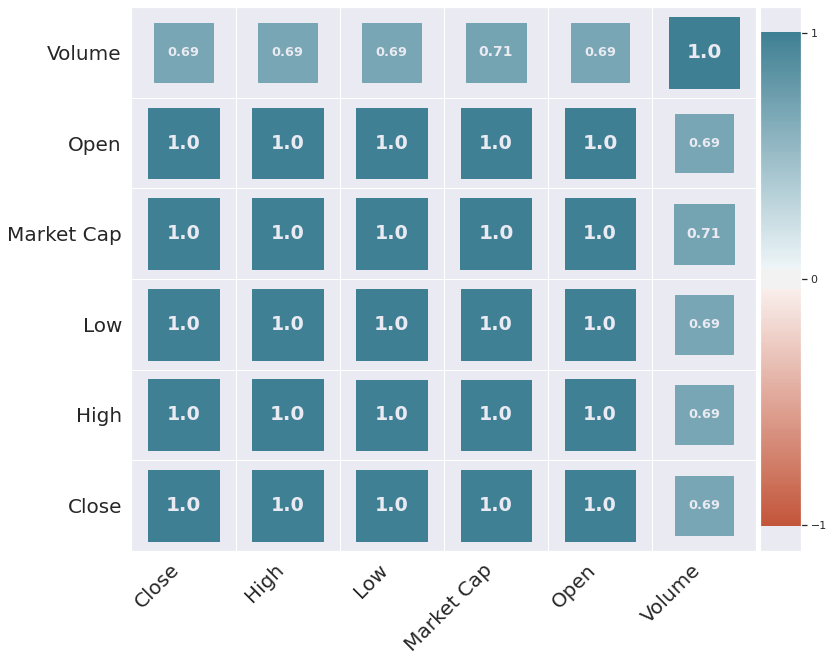

In [24]:
# A function provided in the "eda_functions" Python file that adds a bit of visual flair to a correlation matrix.
dynamic_heatmap(btc, btc.columns, fontsize=20, annot=True, figsize=(12, 10), squaresize=5000)

There also is a strong correlation to the other variables and trading volume, which is to be expected as the magnitude rises with the price. However there are other significant factors at play with that metric. We chose to predict the closing price.

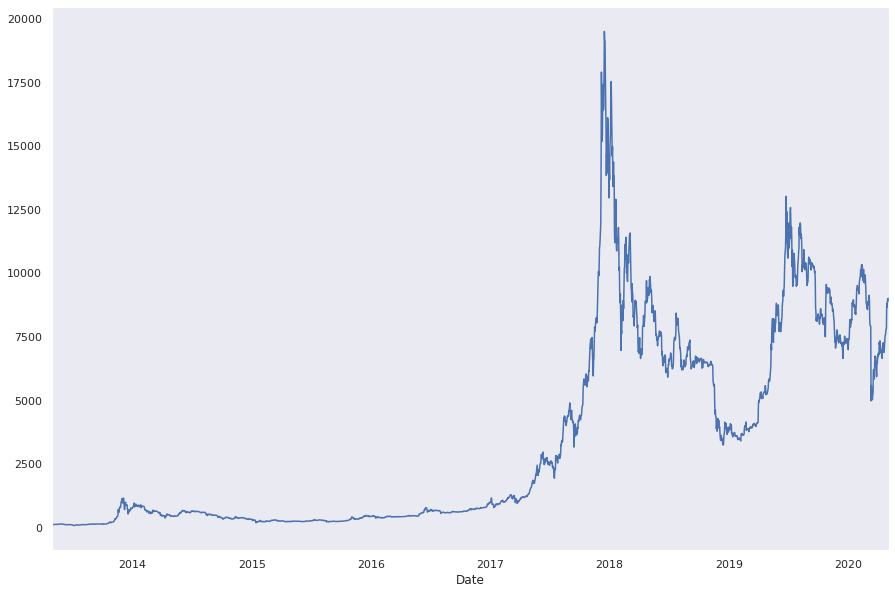

count     2565.000000
mean      3314.980760
std       3847.358582
min         68.430000
25%        387.410000
50%        800.880000
75%       6529.170000
max      19497.400000
Name: Close, dtype: float64

In [26]:
btc["Close"].plot(figsize=(15,10))
plt.show()
btc["Close"].describe()

A quick glance at plot of Bitcoin's price over the years indicates exponential growth. It is so pronounced, that the following Dickey-Fuller test for stationarity, seems downright gratuitous.

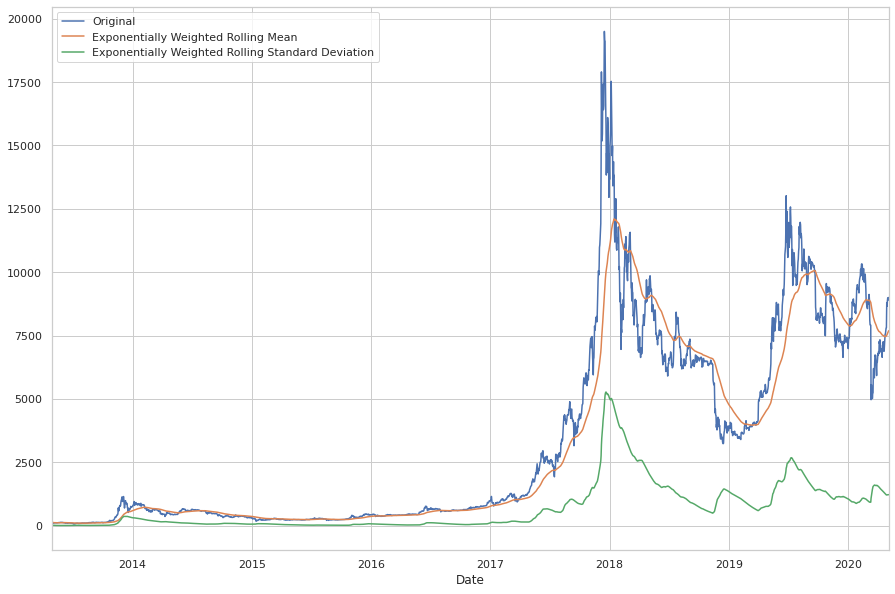

Test Statistic                   -1.564638
p-value                           0.501329
#Lags Used                       27.000000
Number of Observations Used    2537.000000
Critical Value (1%)              -3.432930
Critical Value (5%)              -2.862680
Critical Value (10%)             -2.567377
dtype: float64

In [33]:
# A function provided in the "eda_functions" Python file that plots the rolling mean and rolling standard deviation on top of the raw
# values and performs a Dickey-Fuller test for stationarity.
stationarity_check(btc["Close"], halflife=30, figsize=(15, 10))

We did not have a chance at disproving the null hypothesis. The subsequent models will require a few functions to bring the data to stationarity.

## Extending to other datasets

While the focus of our models is on the price of Bitcoin, extending these notebooks to other cryptocurrencies is a trivial matter (but they may require new transformations and hyperparmeters).

### Ethereum

While not as big of a household name as its peer, this crypto asset's appearance in the headlines is second only to Bitcoin. It has an entirely different use case and while there is some correlation in crypto price movements, it's distinct enough from it's cousin that the same parameters won't apply.

In [34]:
eth_hist1 = pd.read_csv("data/coinmarketcap-all/ethereum_price.csv")
eth_hist2 = coinmarketcap_history("ethereum", "20180221", directory="data")
eth_hist1 = asset_ts_clean(eth_hist1)
eth_hist2 = asset_ts_clean(eth_hist2)
eth = pd.concat([eth_hist1,eth_hist2])

In [43]:
comparison = pd.concat([btc["Close"].rename("Bitcoin"), eth["Close"].rename("Ethereum")], axis=1).dropna()
comparison.corr()

,Bitcoin,Ethereum
Bitcoin,1.000000,0.749639
Ethereum,0.749639,1.000000


### Infinite Altcoins

There are many other interesting candidates to choose from in an ecosystem with a diverse array of consensus algorithm and economic models. We chose the oldest and most pervasive but you do not have to.

In [ ]:
ltc_hist = coinmarketcap_history("litecoin", "20180221", directory="data")
wait_cycle(4,7)
bch_hist = coinmarketcap_history("bitcoin-cash", "20180221", directory="data")
wait_cycle(4,7)
xtz_hist = coinmarketcap_history("tezos", "20180630", directory="data")
wait_cycle(4,7)
grin_hist = coinmarketcap_history("grin", "20190127", directory="data")

An origin during a downturned market, a crack that completely dismantles an innovative algorithm, and a high degree of inbuilt inflation could make for a completely different history.

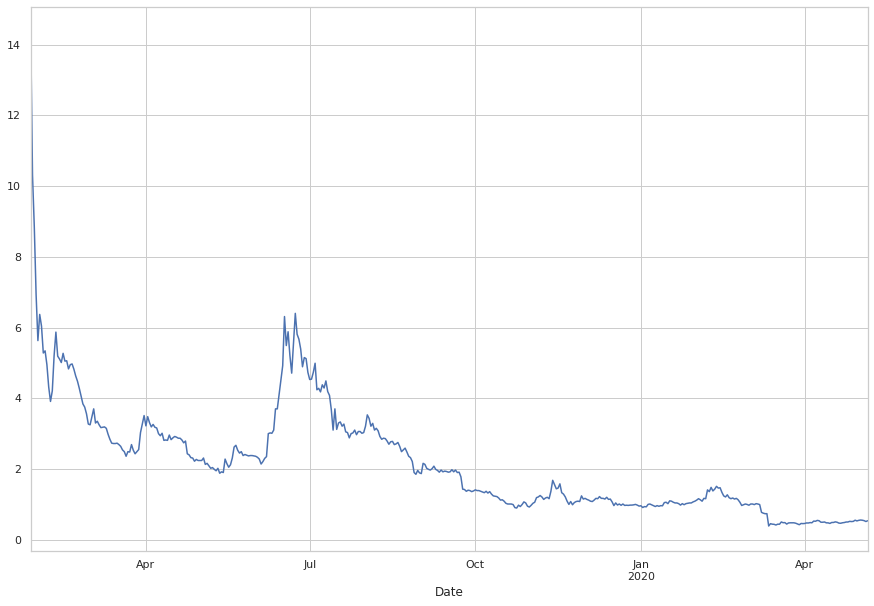

In [50]:
grin["Close"].plot(figsize=(15,10))
plt.show()

### Other Asset Classes

Also included in the code (but unused by our models) is a handy function that will allow for scraping of the data capturing the value of the US dollar against a basket of currencies.

In [2]:
usd_hist = businessinsider_usd_history('20130428')
usd = asset_ts_clean(usd, format="%m/%d/%Y")

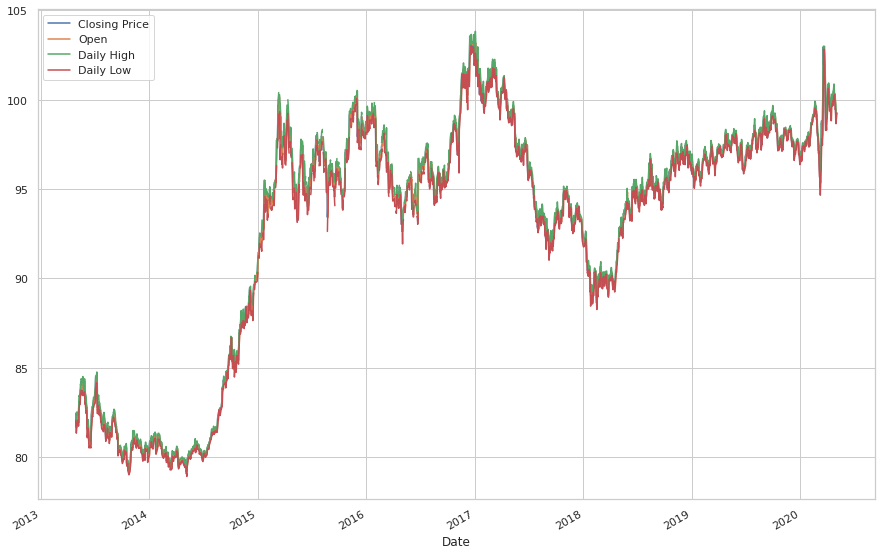

In [54]:
usd.plot(figsize=(15,10))
plt.show()